In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

# plot parameters
param = "param "
NUMBER_OF_POINTS = "NumberOfPoints"
NUMBER_OF_CLUSTERS = "NumberOfClusters"
NUMBER_OF_DIMENSIONS = "NumberOfDimensions"

assignment = ":="
end =";"
# plot parameters
colors = np.array(['blue','green','red','cyan','magenta','yellow','black'])
marker_size = 100
marker_alpha = 0.25



def GenCluster(n,mu,std,rot=True):
    d = len(mu)
    coords = np.random.normal(loc=mu,scale=std,size=(n,d))
    if rot == True:    
        Q = ortho_group.rvs(d)
        mu = np.array(mu)
        coords = np.matmul(coords-mu,Q)
        coords = coords + mu
    return coords

def GenerateClusters(num_points=[100,100,100],STD=[[1,1],[1,1],[1,1]],rot=True):
    num_points = np.array(num_points)
    STD = np.array(STD)
    (num_clusters,d) = STD.shape
    MU = np.random.uniform(low=-10,high=10,size=(num_clusters,d))
    N = num_points.sum()
    coords = np.zeros((N,d))
    labels = np.zeros(N,dtype='int')
    i0 = 0
    for k in np.arange(num_clusters): 
        n = num_points[k]
        mu = MU[k,:]
        std = STD[k,:]
        coords[i0:i0+n,:] = GenCluster(n,mu,std,rot=rot)
        labels[i0:i0+n]   = k
        i0 = i0 + n
    return (coords,labels)


In [3]:

# cluster parameters
num_points = [100,100,100]
STD = [[1,1],[1,1],[1,1]]
rot = True

(coords,labels) = GenerateClusters(num_points=num_points,STD=STD,rot=rot)

In [4]:
df = pd.DataFrame(coords, columns=['x','y'])
df.head()

,x,y
0,-8.867275,-2.702312
1,-7.528873,-4.694712
2,-9.555136,-4.782677
3,-9.711928,-3.916812
4,-8.055766,-3.316879


In [53]:
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        print(k+1,i+1,arr[k][i])
        import os


1 1 7.813794659514899
1 2 -5.191861109703123
2 1 7.119969375211332
2 2 -5.9312305912153205
3 1 8.750411456006747
3 2 -5.864519332581966
4 1 7.746323556542174
4 2 -6.585353882548074
5 1 9.393171429061208
5 2 -7.0895282116478615
6 1 8.041580088828914
6 2 -6.087875266068092
7 1 7.8225815524118065
7 2 -7.060609845178104
8 1 5.648256176470161
8 2 -6.997404115035935
9 1 7.071868388442974
9 2 -5.178510375779346
10 1 5.6715021975770465
10 2 -6.500564852617025
11 1 7.724238133081631
11 2 -4.9372605087461015
12 1 7.137313824764139
12 2 -5.498927702902386
13 1 6.774072982784883
13 2 -5.58592048845838
14 1 6.343652626010442
14 2 -5.955963763823843
15 1 7.753741508954989
15 2 -7.649909451625174
16 1 5.788749065720086
16 2 -4.840253853769537
17 1 6.427417372922678
17 2 -6.690935552550544
18 1 7.585170346189802
18 2 -7.085539180278541
19 1 8.55490993674968
19 2 -7.383995668767054
20 1 5.979685391834378
20 2 -5.19445689915753
21 1 8.526731000136317
21 2 -5.964178959754012
22 1 5.838100231690154
22 2 -

In [54]:
df = df.reset_index()
df['Index'] = df.index+1

In [55]:
df.head()

,index,x,y,Index
0,0,7.813795,-5.191861,1
1,1,7.119969,-5.931231,2
2,2,8.750411,-5.864519,3
3,3,7.746324,-6.585354,4
4,4,9.393171,-7.089528,5


Text(0.5, 1.0, 'KMeans Clusters')

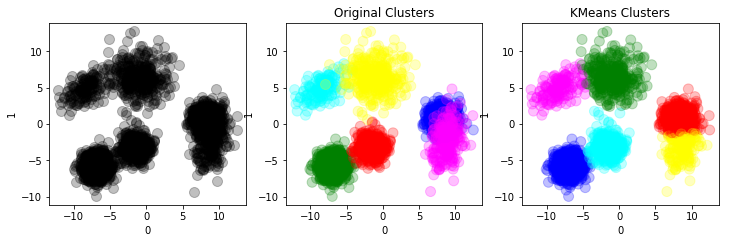

In [56]:
K = 6
num_points = [800,1000,600,150,260,350]
STD = [[1,1],[1,1],[1,1],[1,2],[2,1],[2,2]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [57]:
df.to_csv('3CentroidTest_Points.csv')

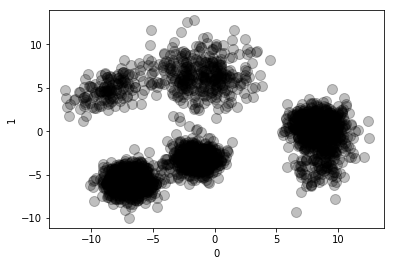

In [58]:
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha)

Text(0.5, 1.0, 'KMeans Clusters')

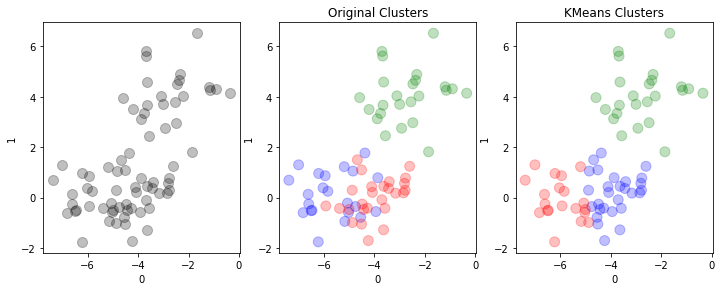

In [59]:
K = 3
num_points = [22,24,26]
STD = [[1,1],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [60]:
folder = "INF_NORM_TEST/"
dat_file_name = "3_by_1.dat"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

In [61]:
fo = open(folder+dat_file_name, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+"72"+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()


In [62]:
folder = "lim_as_n_goes_inf/"
dat_file_name = "big.dat"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

Text(0.5, 1.0, 'KMeans Clusters')

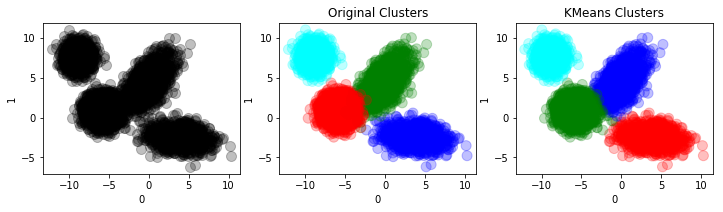

In [63]:
K = 4
num_points = [1000,1400,3000,1234]
STD = [[1,2],[1,2],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

Text(0.5,1,'KMeans Clusters')

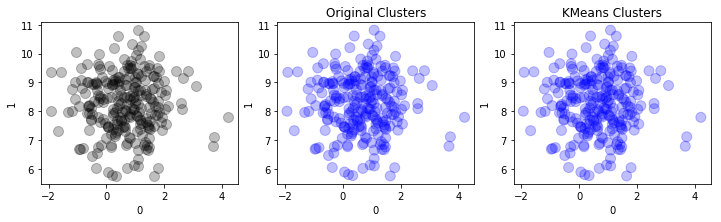

In [14]:
K = 1
num_points = [250]
STD = [[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [15]:
folder = "1Big/"
dat_file_name = "250Points.dat"
point_csv = "250Points.csv"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

In [16]:
df.to_csv(folder+point_csv)
fo = open(folder+dat_file_name, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+str(sum(num_points))+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()